In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("house.csv")
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built
0,313000.0,3,1.50,1340,7912,1.5,1340,0,1955
1,2384000.0,5,2.50,3650,9050,2.0,3370,280,1921
2,342000.0,3,2.00,1930,11947,1.0,1930,0,1966
3,420000.0,3,2.25,2000,8030,1.0,1000,1000,1963
4,550000.0,4,2.50,1940,10500,1.0,1140,800,1976


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   sqft_above     4600 non-null   int64  
 7   sqft_basement  4600 non-null   int64  
 8   yr_built       4600 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 323.6 KB


In [4]:
df.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
sqft_above       False
sqft_basement    False
yr_built         False
dtype: bool

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,1827.265435,312.081522,1970.786304
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,862.168977,464.137228,29.731848
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,370.000000,0.000000,1900.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,1190.000000,0.000000,1951.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,1590.000000,0.000000,1976.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,2300.000000,610.000000,1997.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,9410.000000,4820.000000,2014.000000


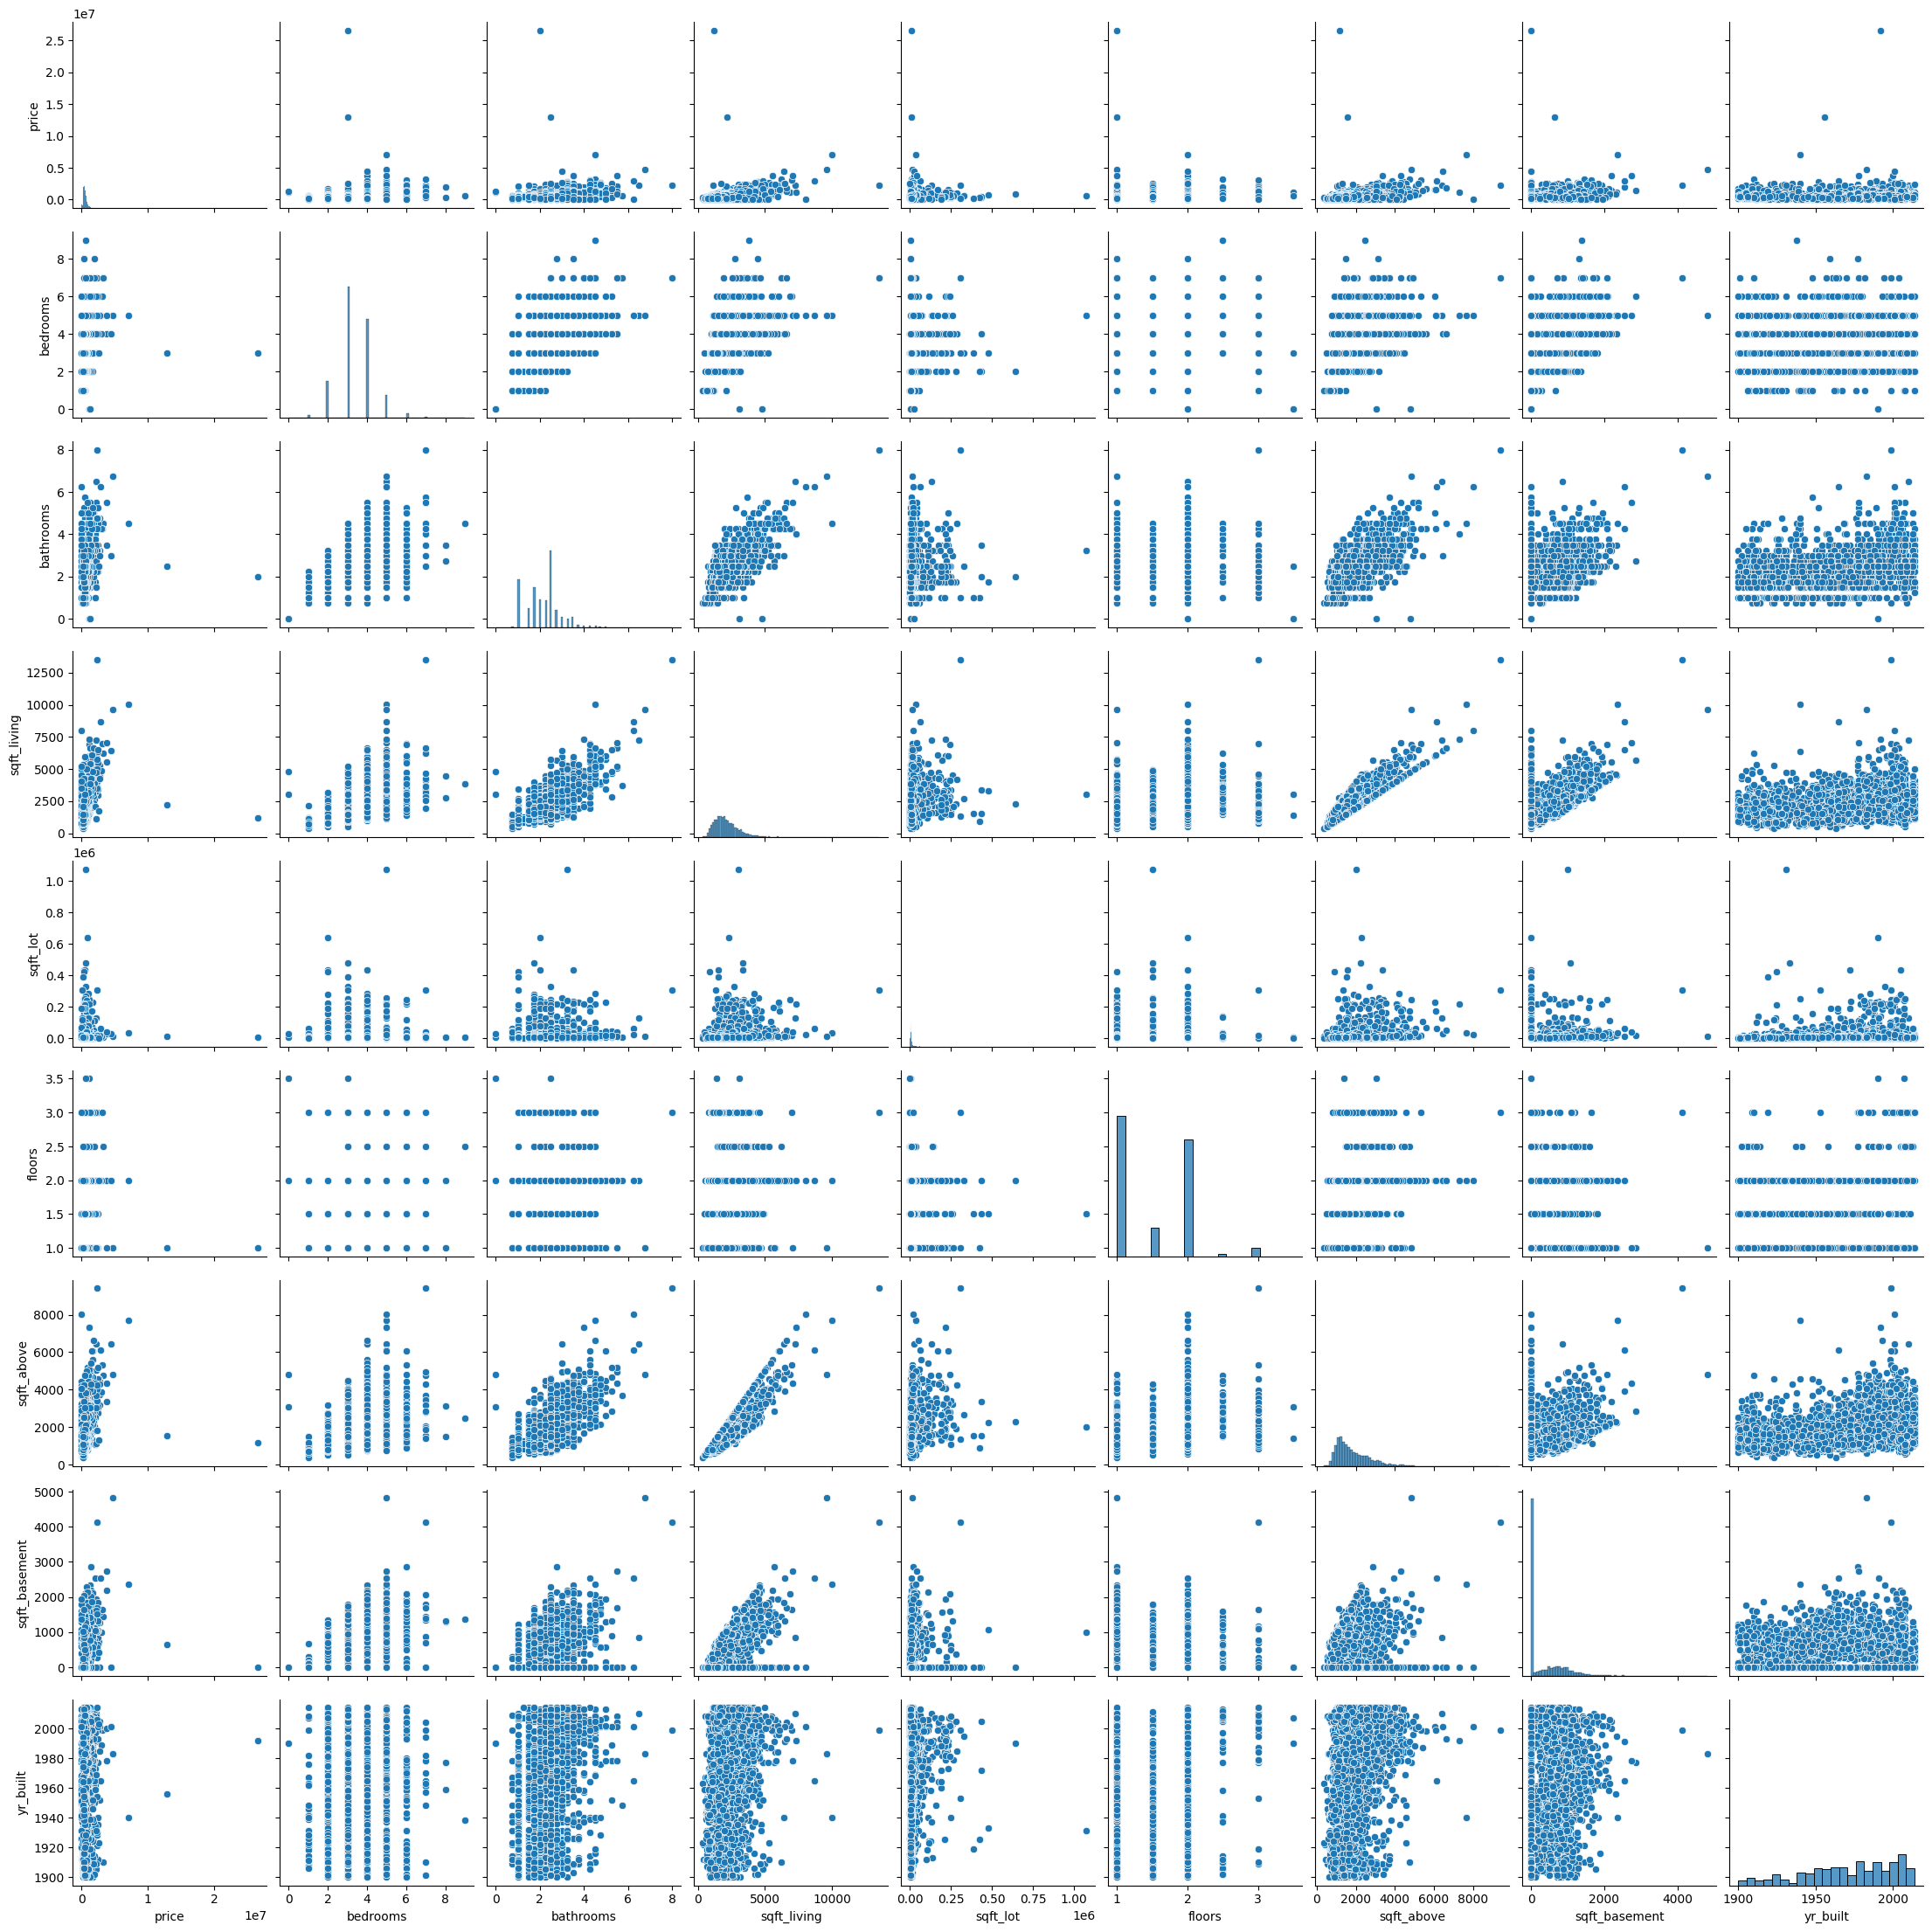

In [6]:
sns.pairplot(df)

<Axes: >

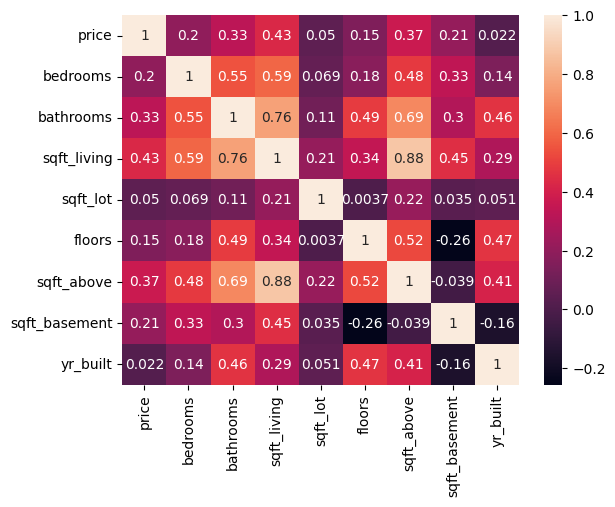

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
x=df.drop("price",axis=1)
y=df["price"]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=100)

In [10]:
x_train.shape

(2760, 8)

In [11]:
x_test.shape

(1840, 8)

In [12]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=["Coefficient"])
coeff

,Coefficient
bedrooms,-56933.681389
bathrooms,68118.403284
sqft_living,160.552445
sqft_lot,-0.612017
floors,36285.660141
sqft_above,86.534803
sqft_basement,74.017642
yr_built,-2635.975171


In [14]:
pred = lr.predict(x_test)
pred

array([656791.22188332, 461300.68970659, 925536.46941216, ...,
       532804.01526444, 435629.59939371, 342535.39600503])

In [15]:
rmse=np.sqrt(mean_squared_error(y_test,pred))
rmse

393912.14212642156

<Axes: xlabel='price'>

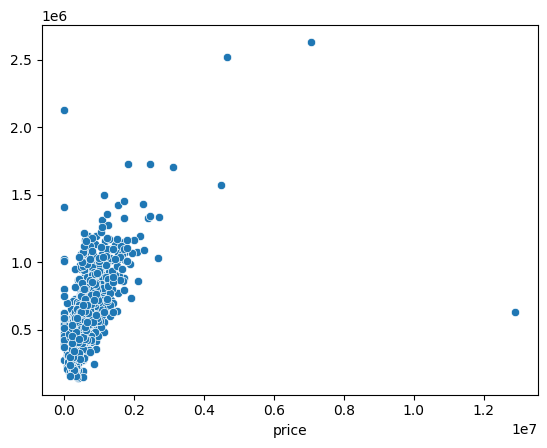

In [16]:
sns.scatterplot(x=y_test,y=pred)